# Import Libraries

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Read Data

In [102]:
data = pd.read_csv("car data.csv")

In [103]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Cleaning

In [104]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [105]:
data.duplicated().sum()

2

In [106]:
data=data.drop_duplicates()

In [107]:
data.shape

(299, 9)

## Check outliers and drop it

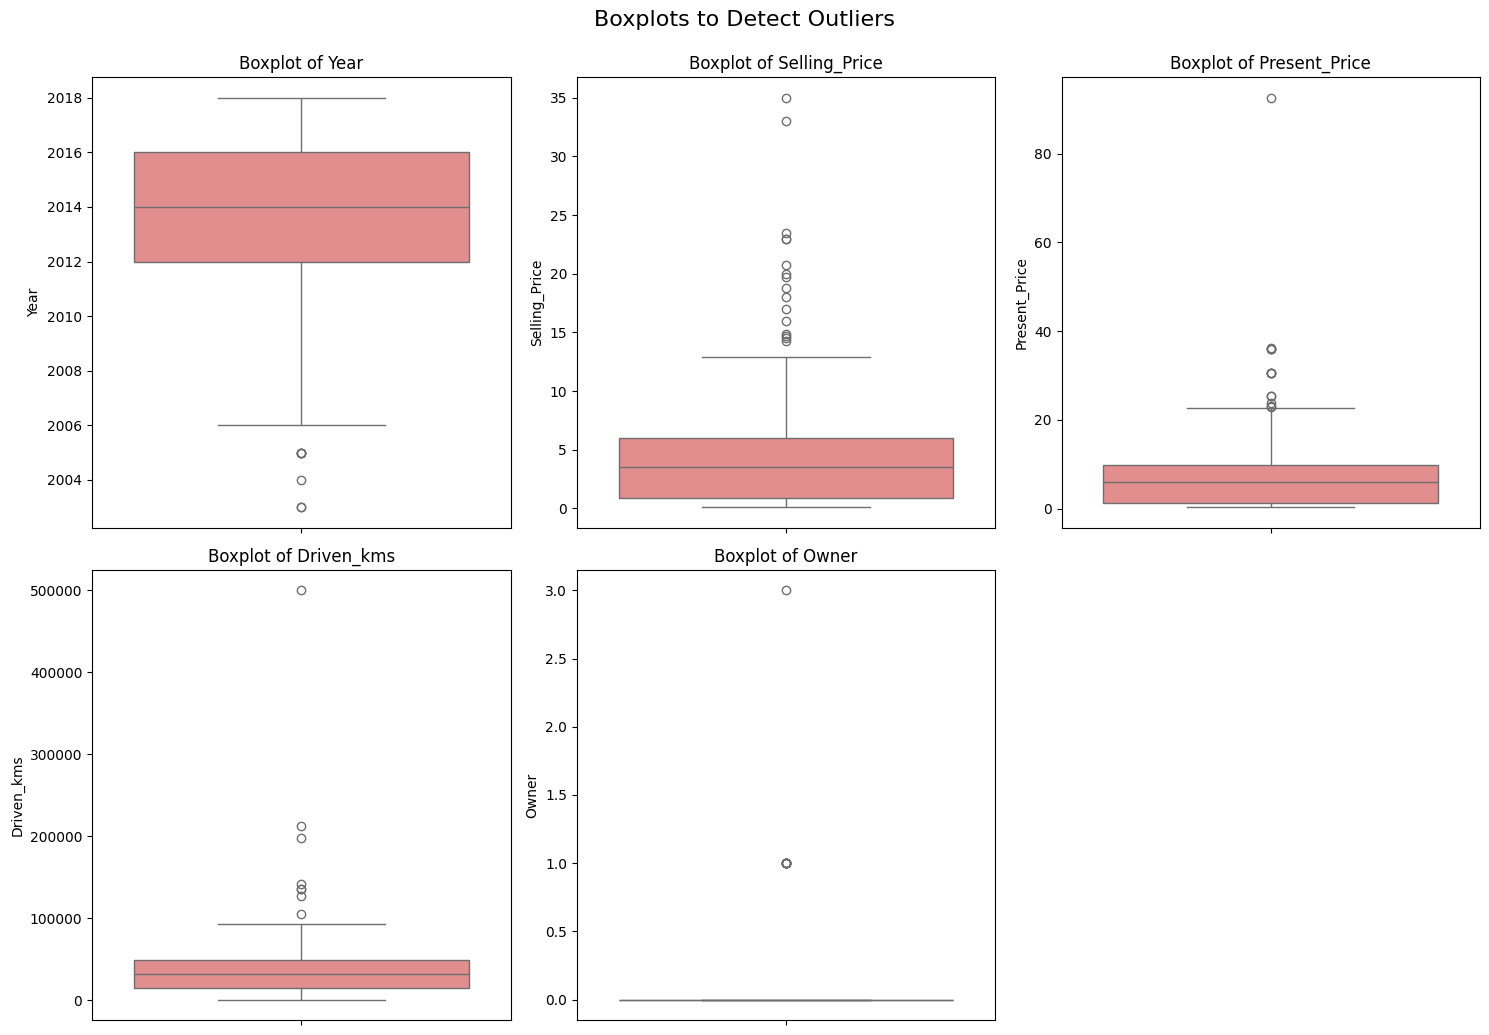

In [108]:
numerical_features = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots to Detect Outliers', fontsize=16, y=1.03)
plt.show()


In [109]:

# Function to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.3 * IQR
    upper_bound = Q3 + 1.3 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function for each numerical column
for col in numerical_features:
       data = remove_outliers_iqr(data, col)

print(f"the shape after removing outliers: {data.shape}")



the shape after removing outliers: (253, 9)


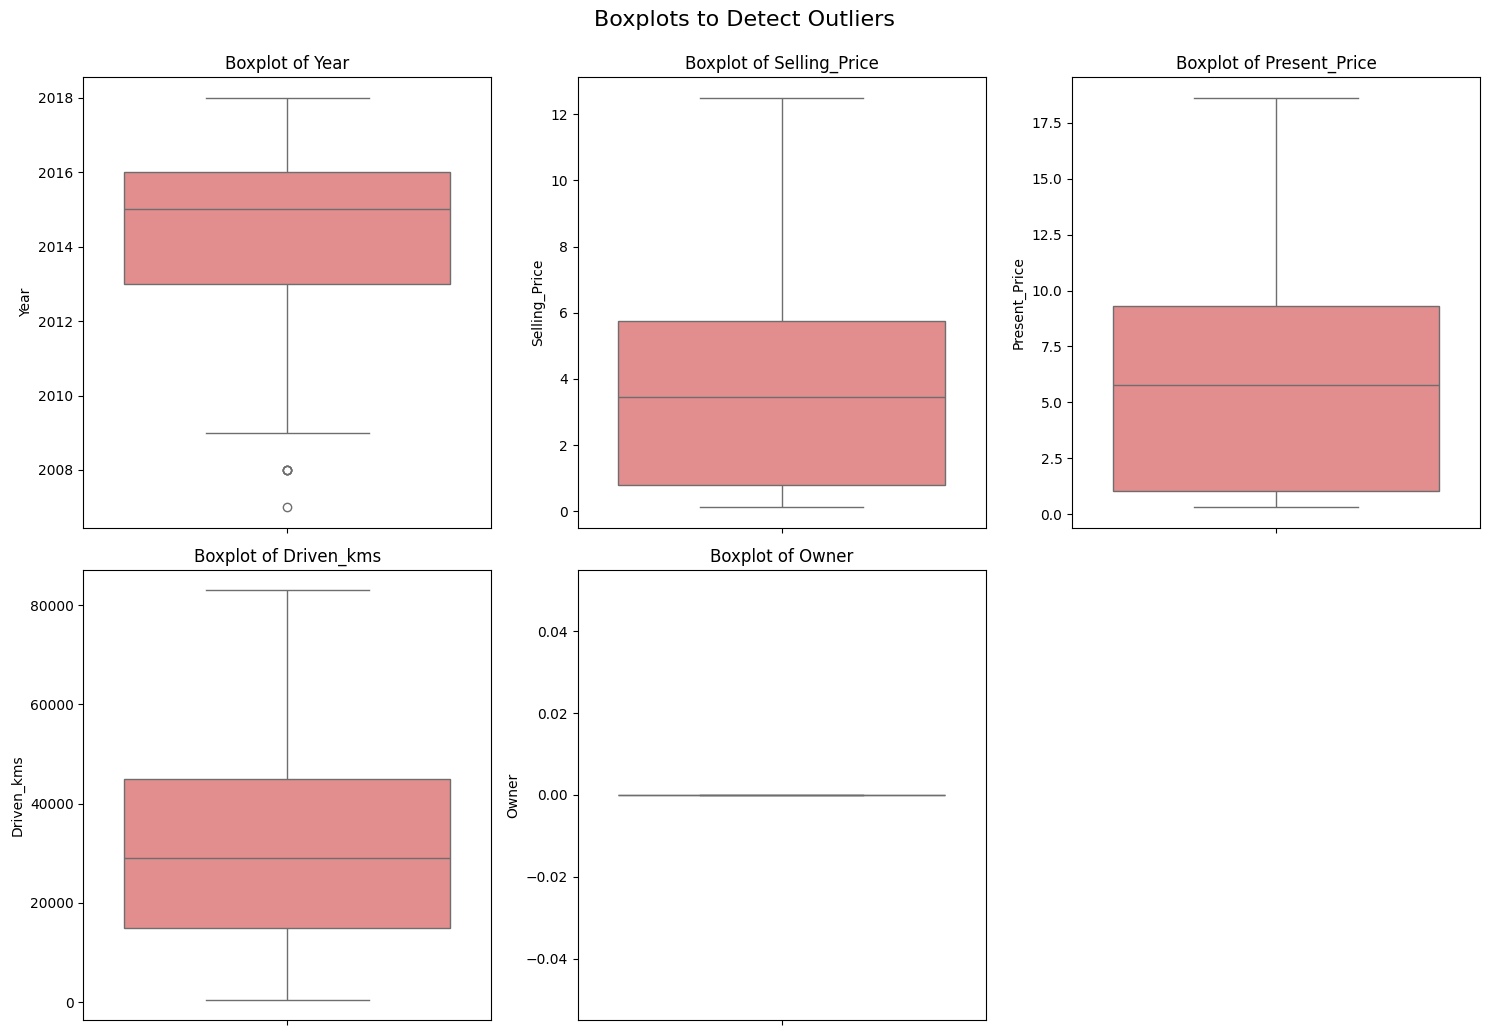

In [110]:
## Check outliers after cleaning
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplots to Detect Outliers', fontsize=16, y=1.03)
plt.show()


# EDA

In [111]:
data.nunique()

Car_Name          88
Year              12
Selling_Price    130
Present_Price    127
Driven_kms       181
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              1
dtype: int64

In [112]:
# Make a new column
data['Car_Age'] = 2025 - data['Year']

In [113]:
## Drop unused columns
data.drop(['Car_Name','Year'],axis=1 ,inplace=True)

In [114]:
data.describe()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,253.000000,253.000000,253.000000,253.0,253.000000
mean,3.784387,5.893755,30432.596838,0.0,10.901186
std,3.028308,4.650412,19525.702806,0.0,2.220512
min,0.120000,0.320000,500.000000,0.0,7.000000
25%,0.780000,1.050000,15000.000000,0.0,9.000000
50%,3.450000,5.800000,29000.000000,0.0,10.000000
75%,5.750000,9.290000,45000.000000,0.0,12.000000
max,12.500000,18.610000,83000.000000,0.0,18.000000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  253 non-null    float64
 1   Present_Price  253 non-null    float64
 2   Driven_kms     253 non-null    int64  
 3   Fuel_Type      253 non-null    object 
 4   Selling_type   253 non-null    object 
 5   Transmission   253 non-null    object 
 6   Owner          253 non-null    int64  
 7   Car_Age        253 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 17.8+ KB


# Data visualization

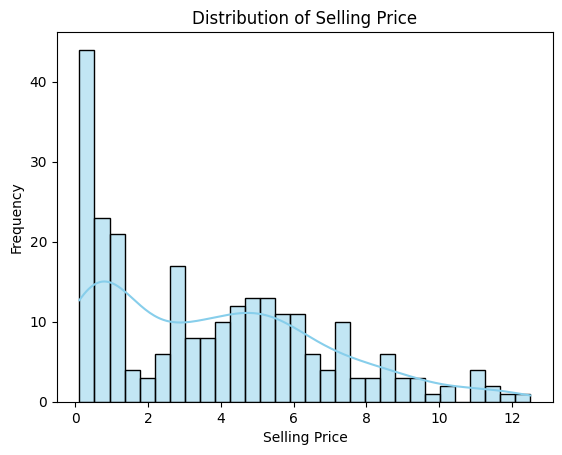

In [116]:
sns.histplot(data['Selling_Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

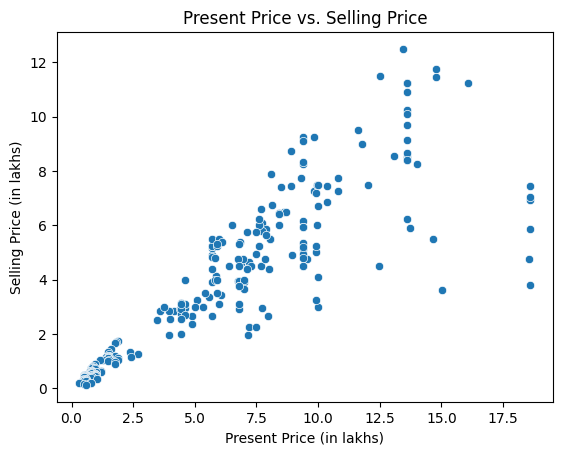

In [117]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Present Price vs. Selling Price')
plt.xlabel('Present Price (in lakhs)')
plt.ylabel('Selling Price (in lakhs)')
plt.show()

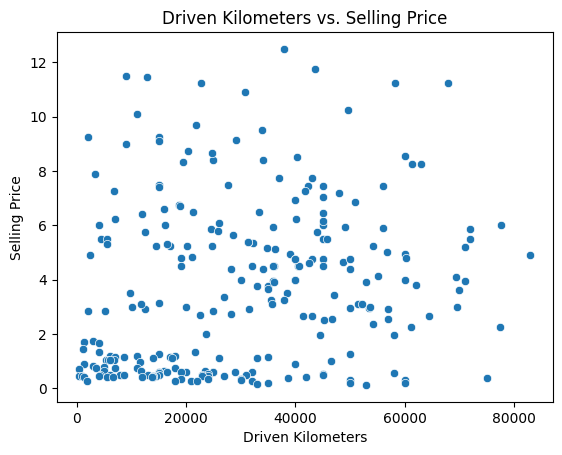

In [118]:
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=data)
plt.title('Driven Kilometers vs. Selling Price')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.show()

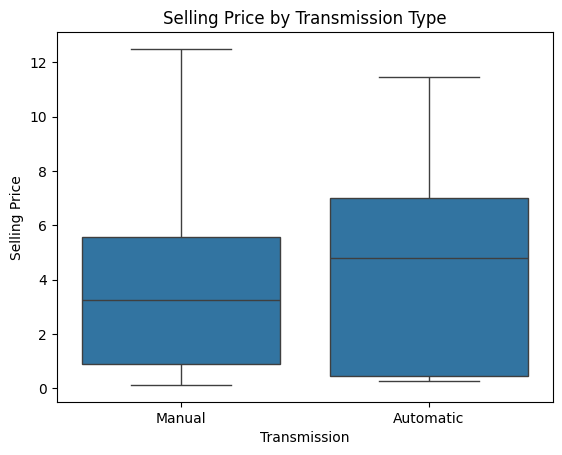

In [119]:
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

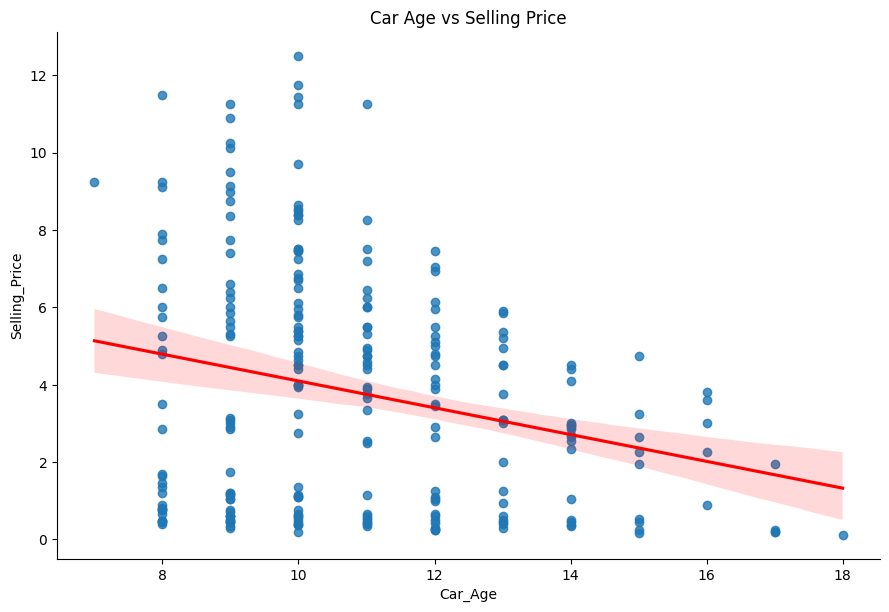

In [120]:

sns.lmplot(x='Car_Age', y='Selling_Price', data=data, height=6, aspect=1.5, line_kws={'color': 'red'})
plt.title('Car Age vs Selling Price')
plt.show()

C:\Users\Nour\AppData\Local\Temp\ipykernel_16736\3160109585.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type', y='Selling_Price', data=data, estimator=np.mean, palette='pastel')


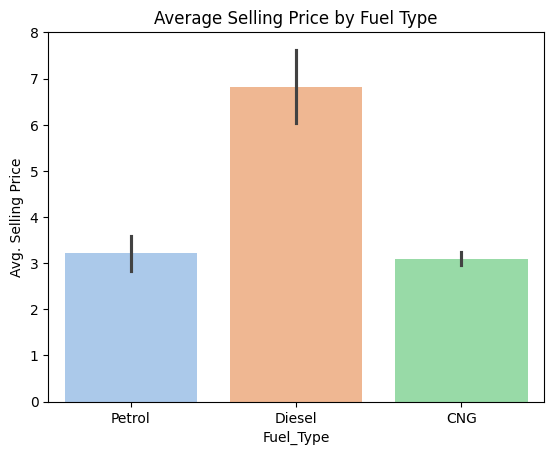

In [121]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data, estimator=np.mean, palette='pastel')
plt.title('Average Selling Price by Fuel Type')
plt.ylabel('Avg. Selling Price')
plt.show()


C:\Users\Nour\AppData\Local\Temp\ipykernel_16736\2812690331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=data, palette='Set2')


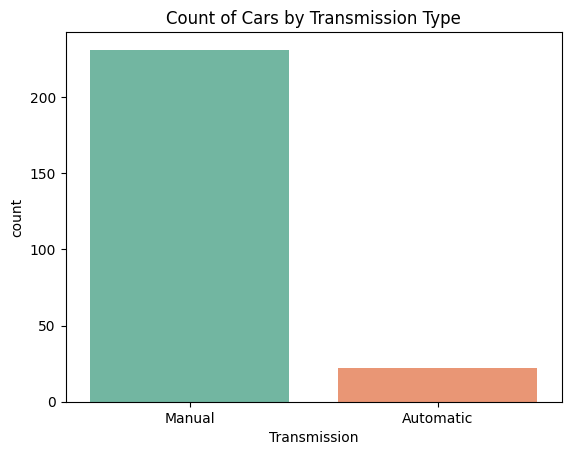

In [122]:
sns.countplot(x='Transmission', data=data, palette='Set2')
plt.title('Count of Cars by Transmission Type')
plt.show()


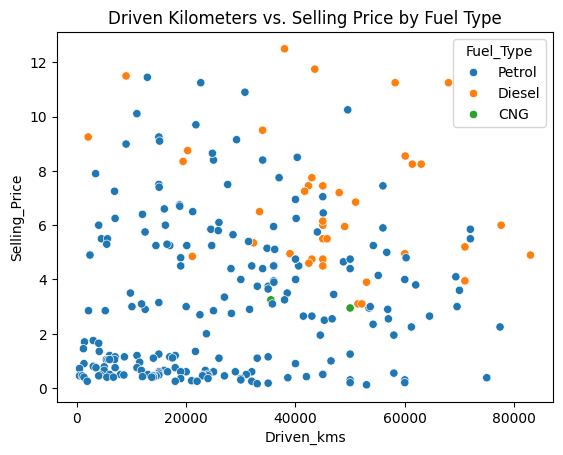

In [123]:
sns.scatterplot(x='Driven_kms', y='Selling_Price', hue='Fuel_Type', data=data)
plt.title('Driven Kilometers vs. Selling Price by Fuel Type')
plt.show()


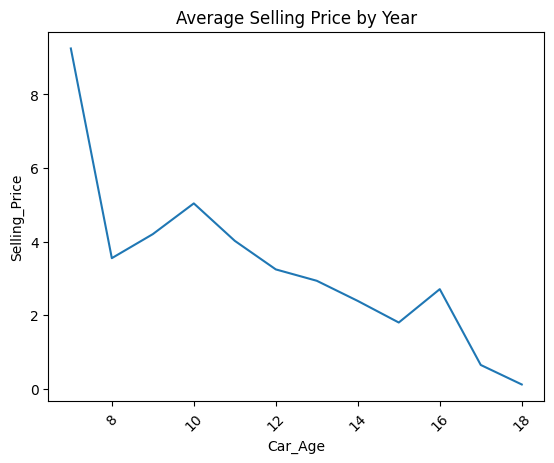

In [124]:
avg_price_by_year = data.groupby('Car_Age')['Selling_Price'].mean().reset_index()

sns.lineplot(x='Car_Age', y='Selling_Price', data=avg_price_by_year)
plt.title('Average Selling Price by Year')
plt.xticks(rotation=45)
plt.show()


# Preprocessing

In [125]:
data

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...
295,8.55,13.09,60076,Diesel,Dealer,Manual,0,10
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [126]:
## Divide the columns
cats_cols = ['Fuel_Type','Selling_type','Transmission']
numerical_features = ['Car_Age', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']


In [127]:
# Scale and hot encode the features
scalar =StandardScaler()
data[numerical_features] = scalar.fit_transform(data[numerical_features])
data = pd.get_dummies(data, columns=cats_cols, drop_first=True)


In [128]:
# Check the data after preprocessing
data

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,-0.143727,-0.065447,-0.176147,0.0,0.044589,False,True,False,True
1,0.319494,0.785623,0.644910,0.0,0.495828,True,False,False,True
2,1.146674,0.852416,-1.207600,0.0,-1.309129,False,True,False,True
3,-0.309163,-0.375711,-1.294837,0.0,1.398307,False,True,False,True
4,0.269863,0.210343,0.616686,0.0,0.044589,True,False,False,True
...,...,...,...,...,...,...,...,...,...
295,1.576808,1.550510,1.521183,0.0,-0.406650,True,False,False,True
296,1.891136,1.229473,0.182449,0.0,-0.857890,True,False,False,True
297,0.071340,0.001346,1.517283,0.0,-0.406650,False,True,False,True
299,2.552880,1.423388,-1.099836,0.0,-1.309129,True,False,False,True


## Because the data is not big enough so remove some columns from the data would affect the models negativly

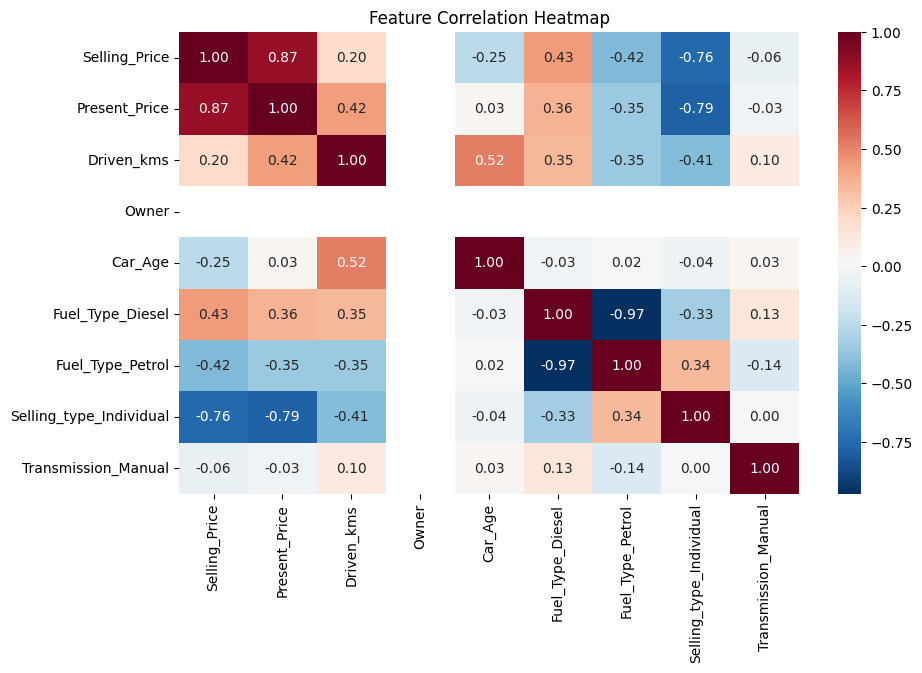

In [129]:
## Check outliers
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# Building the models

In [130]:
X =data.drop('Selling_Price',axis=1)
y= data['Selling_Price']

In [131]:
# SPlit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# Try diffrent models to get the highest accuracy

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
    "MLP Regressor (Neural Net)": MLPRegressor(max_iter=1000)
}

# Evaluate each model
print("Model Evaluation Results:\n")
for name, model in models.items():
    # Use scaled data for models that require it
    X_train_use = X_train if name in ["Linear Regression", "Support Vector Regressor", "MLP Regressor (Neural Net)", "KNN Regressor"] else X_train
    X_test_use = X_test if name in ["Linear Regression", "Support Vector Regressor", "MLP Regressor (Neural Net)", "KNN Regressor"] else X_test
    
    # Train and predict
    model.fit(X_train_use, y_train)
    y_pred = model.predict(X_test_use)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Output
    print(f" {name}")
    print(f"    MSE: {mse:.4f}")
    print(f"    MAE: {mae:.4f}")
    print(f"    R² Score: {r2:.4f}")
    print("-" * 50)


Model Evaluation Results:

 Linear Regression
    MSE: 0.0873
    MAE: 0.2154
    R² Score: 0.8809
--------------------------------------------------
 Decision Tree
    MSE: 0.1015
    MAE: 0.1935
    R² Score: 0.8616
--------------------------------------------------
 Random Forest
    MSE: 0.0359
    MAE: 0.1264
    R² Score: 0.9510
--------------------------------------------------
 Gradient Boosting
    MSE: 0.0388
    MAE: 0.1255
    R² Score: 0.9471
--------------------------------------------------
 KNN Regressor
    MSE: 0.0702
    MAE: 0.2140
    R² Score: 0.9043
--------------------------------------------------
 Support Vector Regressor
    MSE: 0.0305
    MAE: 0.1412
    R² Score: 0.9584
--------------------------------------------------
 MLP Regressor (Neural Net)
    MSE: 0.0475
    MAE: 0.1652
    R² Score: 0.9352
--------------------------------------------------


# The best model ever is the Support vector regressor with the maximum R² score 95 percent ans MSE 